# Лабораторная работа №3. Синтез БИХ-фильтров




## Модуль 1. Метод размещения нулей и полюсов.


### Задача 1.1 Синтез цифрового резонатора

| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |     $7$ |    $8$ |    $9$ |    $10$ | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_0$  | $0.25$ | $0.2$ | $0.1$ |  $—$ | $—$ | $—$ | $0.3$ | $0.15$ | $0.35$ | $0.4$ |
|$\theta_0$ | $—$ | $—$ | $—$ | $\dfrac\pi6$ | $\dfrac\pi3$ | $\dfrac\pi2$ |  $—$ | $—$ | $—$ | $—$ |

Синтезировать методом размещения нулей и полюсов цифровой резонатор для частоты $\nu_0$ или $\theta_0$ (в зависимости от варианта). Параметр, влияющий на добротность резонатора, подобрать самостоятельно.

* Построить нуль-полюсную диаграмму получившегося фильтра.
* Записать передаточную функцию $H(z)$.
* Вычислить аналитически импульсную и переходную характеристики и сравнить с результатами моделирования.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.

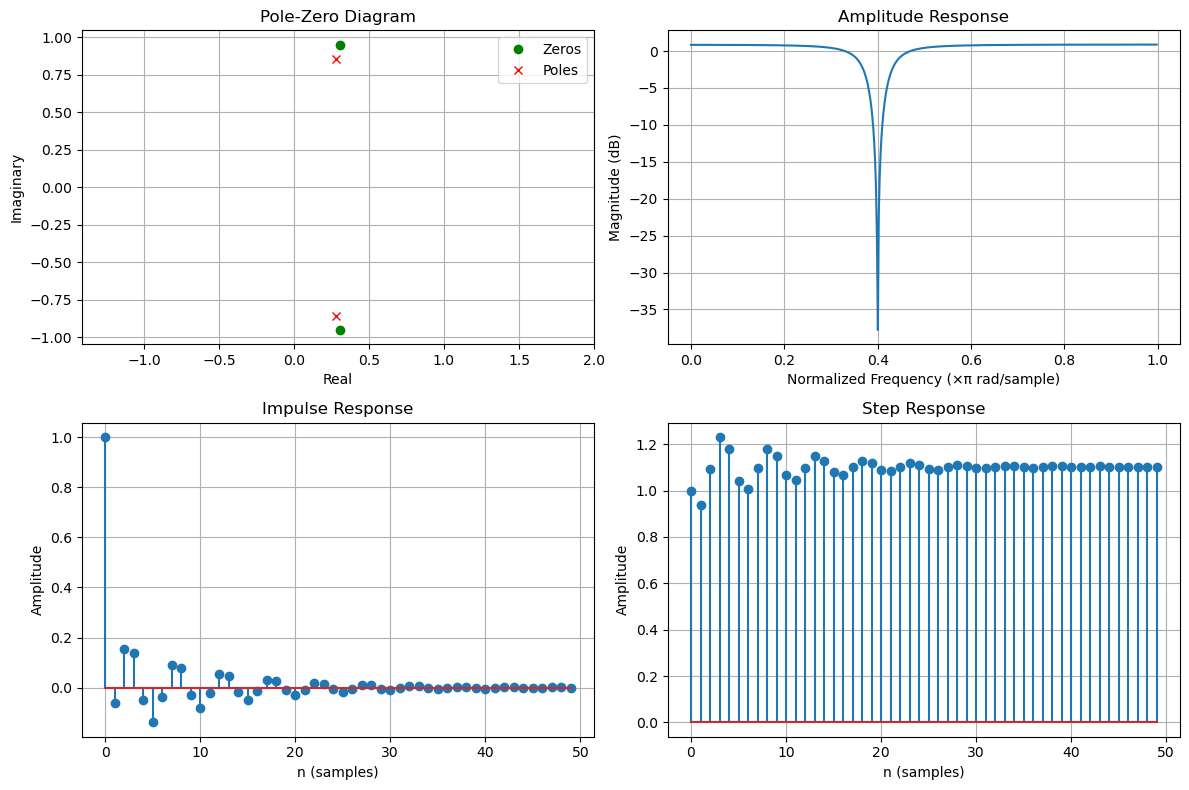

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters for Variant 2
nu_0 = 0.2  # Given frequency
omega_0 = 2 * np.pi * nu_0  # Angular frequency
r = 0.9  # Damping factor, adjust for quality of the resonator

# Step 1: Transfer function H(z)
# The numerator and denominator of H(z)
b = [1, -2 * np.cos(omega_0), 1]  # Numerator (zeros at the origin)
a = [1, -2 * r * np.cos(omega_0), r**2]  # Denominator (poles near the unit circle)

# Step 2: Frequency response (Amplitude and Phase response)
w, h = signal.freqz(b, a)

# Step 3: Impulse and Step Responses
impulse = np.zeros(50)
impulse[0] = 1  # Unit impulse
impulse_response = signal.lfilter(b, a, impulse)

step = np.ones(50)
step_response = signal.lfilter(b, a, step)

# Step 4: Pole-zero diagram
z, p, k = signal.tf2zpk(b, a)

# Plot results
plt.figure(figsize=(12, 8))

# Plot pole-zero diagram
plt.subplot(2, 2, 1)
plt.plot(np.real(z), np.imag(z), 'go', label='Zeros')
plt.plot(np.real(p), np.imag(p), 'rx', label='Poles')
plt.title('Pole-Zero Diagram')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.legend()
plt.axis('equal')

# Plot amplitude response
plt.subplot(2, 2, 2)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('Amplitude Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plot impulse response
plt.subplot(2, 2, 3)
plt.stem(impulse_response)
plt.title('Impulse Response')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot step response
plt.subplot(2, 2, 4)
plt.stem(step_response)
plt.title('Step Response')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()


### Задача 1.2 Синтез цифрового фильтра Hum removal

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |  
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_0$, Гц  | 250 | 350 | 400 |  200 | 100 | 150 | 250 | 500| 600 | 350 |
|  $f_д$, Гц | 1000 | 1000 | 1000 | 500 | 500 | 500 | 1000 | 2000 | 2000 | 2000 |

Синтезировать методом размещения нулей и полюсов цифровой фильтр Hum removal  для частоты $f_{0}$, $f_{д}$. Параметр, влияющий на добротность, подобрать самостоятельно.

* Записать передаточную функцию $H(z)$.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.


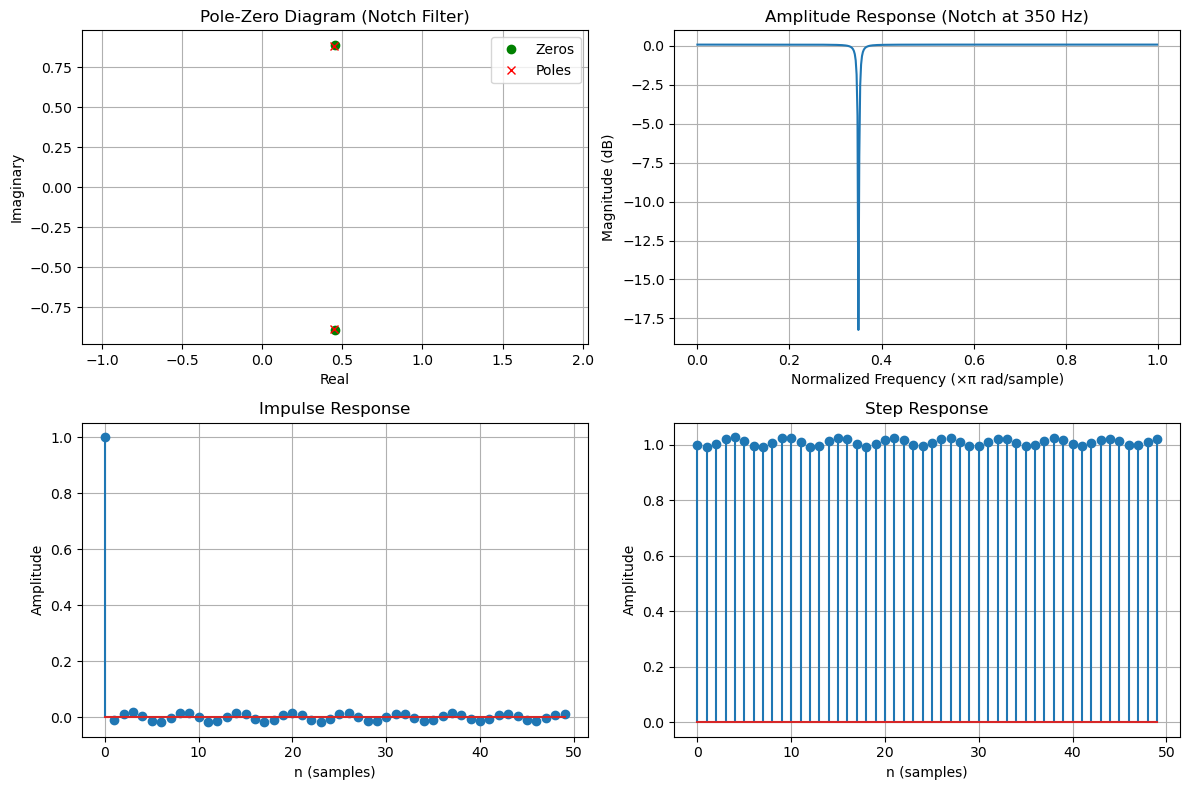

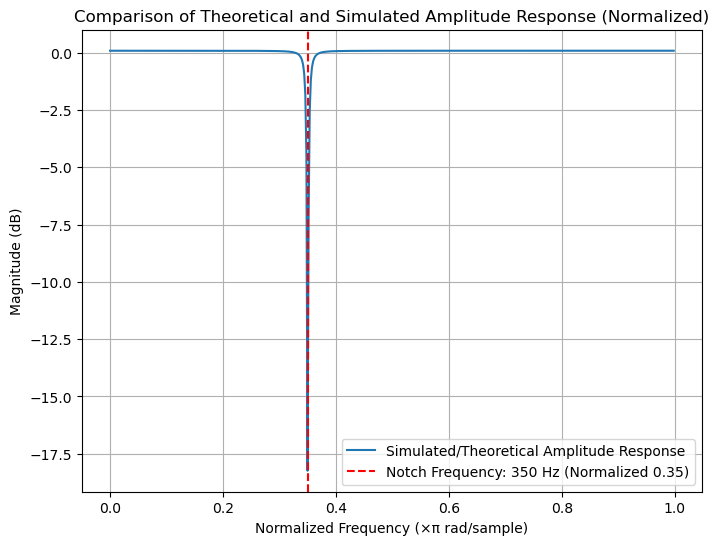

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters for Variant 2
f_0 = 350  # Hum frequency in Hz
f_d = 1000  # Nyquist frequency (half of the sampling rate) in Hz
f_s = 2 * f_d  # Sampling frequency
nu_0 = f_0 / f_s  # Normalized frequency

# Angular frequency corresponding to f_0
omega_0 = 2 * np.pi * nu_0

# Designing the notch filter
# Zeros exactly at exp(±j*omega_0) on the unit circle
# Poles just inside the unit circle for stability
r = 0.99  # Close to 1 but less than 1 for stability

# Transfer function H(z) for notch filter
b = [1, -2 * np.cos(omega_0), 1]  # Zeros at the frequency to be removed
a = [1, -2 * r * np.cos(omega_0), r**2]  # Poles slightly inside the unit circle

# Frequency response (Amplitude and Phase response)
w, h = signal.freqz(b, a)

# Impulse and Step Responses
impulse = np.zeros(50)
impulse[0] = 1  # Unit impulse
impulse_response = signal.lfilter(b, a, impulse)

step = np.ones(50)
step_response = signal.lfilter(b, a, step)

# Pole-zero diagram
z, p, k = signal.tf2zpk(b, a)

# Plot results
plt.figure(figsize=(12, 8))

# Plot pole-zero diagram
plt.subplot(2, 2, 1)
plt.plot(np.real(z), np.imag(z), 'go', label='Zeros')
plt.plot(np.real(p), np.imag(p), 'rx', label='Poles')
plt.title('Pole-Zero Diagram (Notch Filter)')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.legend()
plt.axis('equal')

# Plot amplitude response
plt.subplot(2, 2, 2)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('Amplitude Response (Notch at 350 Hz)')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plot impulse response
plt.subplot(2, 2, 3)
plt.stem(impulse_response)
plt.title('Impulse Response')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot step response
plt.subplot(2, 2, 4)
plt.stem(step_response)
plt.title('Step Response')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()





import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters for Variant 2
f_0 = 350  # Hum frequency in Hz
f_d = 1000  # Nyquist frequency (half of the sampling rate) in Hz
f_s = 2 * f_d  # Sampling frequency
nu_0 = f_0 / f_s  # Correct normalized frequency (relative to full sampling frequency)

# Angular frequency corresponding to f_0
omega_0 = 2 * np.pi * nu_0

# Designing the notch filter
r = 0.99  # Close to 1 but less than 1 for stability

# Transfer function H(z) for notch filter
b = [1, -2 * np.cos(omega_0), 1]  # Zeros at the frequency to be removed
a = [1, -2 * r * np.cos(omega_0), r**2]  # Poles slightly inside the unit circle

# Step 1: Theoretical Amplitude Response using H(z)
w, h = signal.freqz(b, a)  # Theoretical response

# Convert the frequency to normalized with respect to the Nyquist frequency
normalized_freq = w / np.pi

# Plot comparison of theoretical vs simulated (in normalized frequency)
plt.figure(figsize=(8, 6))

# Plot amplitude response (theoretical and simulated are the same in this case)
plt.plot(normalized_freq, 20 * np.log10(abs(h)), label='Simulated/Theoretical Amplitude Response')

# Correctly place the vertical line at the normalized frequency of the notch
plt.axvline(x=nu_0 * 2, color='red', linestyle='--', label=f'Notch Frequency: {f_0} Hz (Normalized {nu_0 * 2:.2f})')

plt.title('Comparison of Theoretical and Simulated Amplitude Response (Normalized)')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)

# Show the comparison plot
plt.show()




## Модуль 2. Метод билинейного *z*-преобразования

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 | 6200 | 6400 |  6600 | 6800 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 | 860 | 920 | 980 | 1040 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |1170 | 1240 | 1310 | 1380 |
|  $a_\max$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_\min$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_\max$,
* минимальное допустимое затухание в полосе задерживания $a_\min$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


Butterworth filter order: 16
Chebyshev Type I filter order: 8
Chebyshev Type II filter order: 8
Elliptic filter order: 5


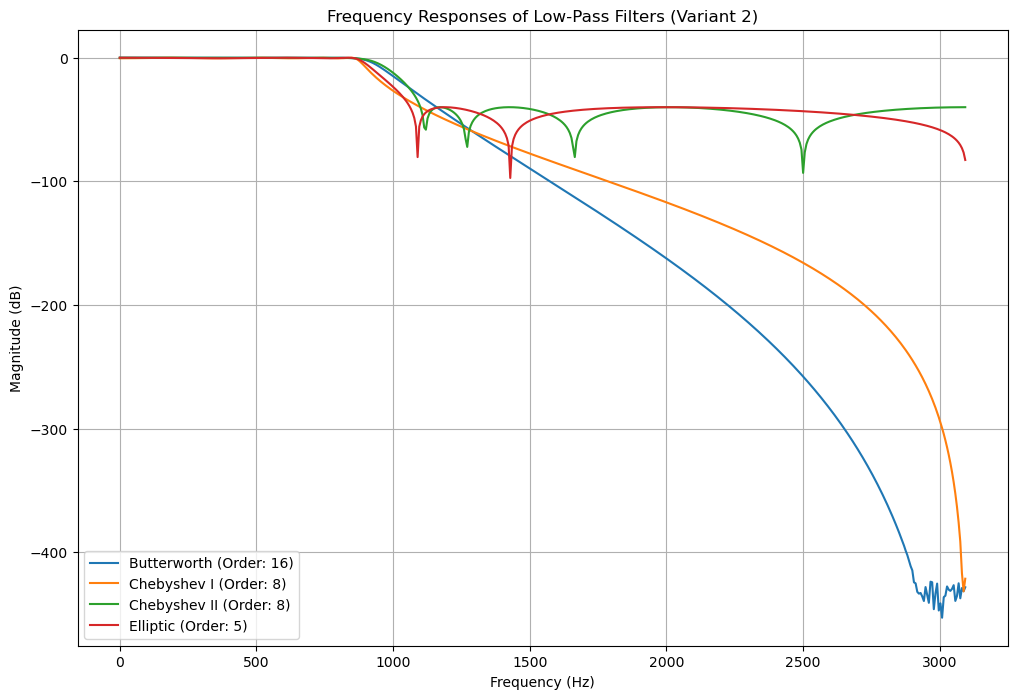

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Given filter parameters for Variant 2
f_s = 6200  # Sampling frequency in Hz
f_p = 860   # Passband frequency in Hz
f_sbp = 1170  # Stopband frequency in Hz
alpha_max = 0.4455  # Maximum attenuation in the passband in dB
alpha_min = 40  # Minimum attenuation in the stopband in dB

# Convert frequencies to normalized form (relative to Nyquist frequency)
nyquist = f_s / 2
wp = f_p / nyquist  # Normalized passband frequency
ws = f_sbp / nyquist  # Normalized stopband frequency

# Step 1: Butterworth filter design
N_butter, Wn_butter = signal.buttord(wp, ws, alpha_max, alpha_min)
b_butter, a_butter = signal.butter(N_butter, Wn_butter, btype='low')

# Step 2: Chebyshev Type I filter design
N_cheby1, Wn_cheby1 = signal.cheb1ord(wp, ws, alpha_max, alpha_min)
b_cheby1, a_cheby1 = signal.cheby1(N_cheby1, alpha_max, Wn_cheby1, btype='low')

# Step 3: Chebyshev Type II filter design
N_cheby2, Wn_cheby2 = signal.cheb2ord(wp, ws, alpha_max, alpha_min)
b_cheby2, a_cheby2 = signal.cheby2(N_cheby2, alpha_min, Wn_cheby2, btype='low')

# Step 4: Elliptic (Cauer) filter design
N_ellip, Wn_ellip = signal.ellipord(wp, ws, alpha_max, alpha_min)
b_ellip, a_ellip = signal.ellip(N_ellip, alpha_max, alpha_min, Wn_ellip, btype='low')

# Display the results for each filter's order
print(f"Butterworth filter order: {N_butter}")
print(f"Chebyshev Type I filter order: {N_cheby1}")
print(f"Chebyshev Type II filter order: {N_cheby2}")
print(f"Elliptic filter order: {N_ellip}")

# Plot the frequency response of each filter
plt.figure(figsize=(12, 8))

# Butterworth
w, h = signal.freqz(b_butter, a_butter, fs=f_s)
plt.plot(w, 20 * np.log10(abs(h)), label=f'Butterworth (Order: {N_butter})')

# Chebyshev Type I
w, h = signal.freqz(b_cheby1, a_cheby1, fs=f_s)
plt.plot(w, 20 * np.log10(abs(h)), label=f'Chebyshev I (Order: {N_cheby1})')

# Chebyshev Type II
w, h = signal.freqz(b_cheby2, a_cheby2, fs=f_s)
plt.plot(w, 20 * np.log10(abs(h)), label=f'Chebyshev II (Order: {N_cheby2})')

# Elliptic
w, h = signal.freqz(b_ellip, a_ellip, fs=f_s)
plt.plot(w, 20 * np.log10(abs(h)), label=f'Elliptic (Order: {N_ellip})')

# Add plot details
plt.title('Frequency Responses of Low-Pass Filters (Variant 2)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid()
plt.show()


### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра (I способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

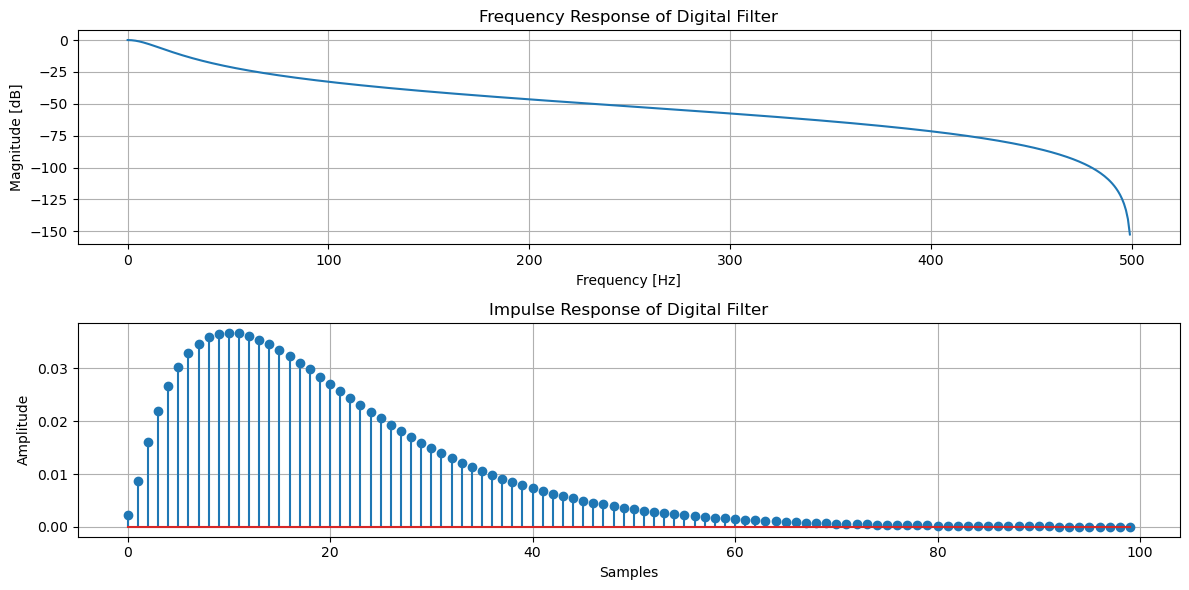

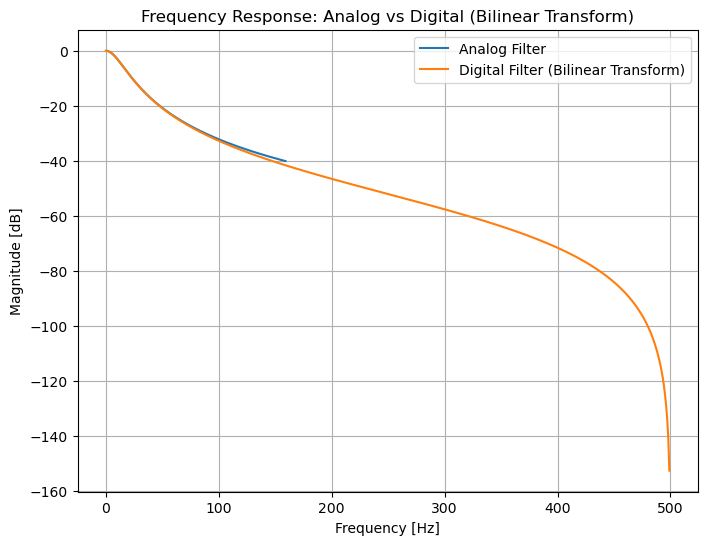

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters for the two-stage RC filter
RC = 0.01  # Choose RC parameter for the filter 
fs = 1000  # Sampling frequency (Hz)
T = 1 / fs  # Sampling period

# Analog two-stage RC low-pass filter transfer function
# H(s) = (1 / (1 + sRC))^2 = numerator / denominator in s-domain
numerator_analog = [1]
denominator_analog = [RC**2, 2*RC, 1]

# Step 1: Apply bilinear transform to convert the analog filter to digital
b_digital, a_digital = signal.bilinear(numerator_analog, denominator_analog, fs)

# Step 2: Frequency response of the digital filter
w_digital, h_digital = signal.freqz(b_digital, a_digital, fs=fs)

# Step 3: Impulse response of the digital filter
impulse = np.zeros(100)
impulse[0] = 1  # Impulse input
impulse_response_digital = signal.lfilter(b_digital, a_digital, impulse)

# Step 4: Plot the frequency and impulse responses of the digital filter
plt.figure(figsize=(12, 6))

# Plot frequency response
plt.subplot(2, 1, 1)
plt.plot(w_digital, 20 * np.log10(abs(h_digital)), label="Digital Filter (Bilinear Transform)")
plt.title("Frequency Response of Digital Filter")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()

# Plot impulse response
plt.subplot(2, 1, 2)
plt.stem(impulse_response_digital)
plt.title("Impulse Response of Digital Filter")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

# For comparison, let's calculate the analog filter's frequency response
w_analog, h_analog = signal.freqs(numerator_analog, denominator_analog)

# Plot analog and digital filter frequency responses together
plt.figure(figsize=(8, 6))

plt.plot(w_analog / (2 * np.pi), 20 * np.log10(abs(h_analog)), label="Analog Filter")
plt.plot(w_digital, 20 * np.log10(abs(h_digital)), label="Digital Filter (Bilinear Transform)")
plt.title("Frequency Response: Analog vs Digital (Bilinear Transform)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.legend()
plt.grid()
plt.show()


## Модуль 3. Метод инвариантной импульсной характеристики.

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

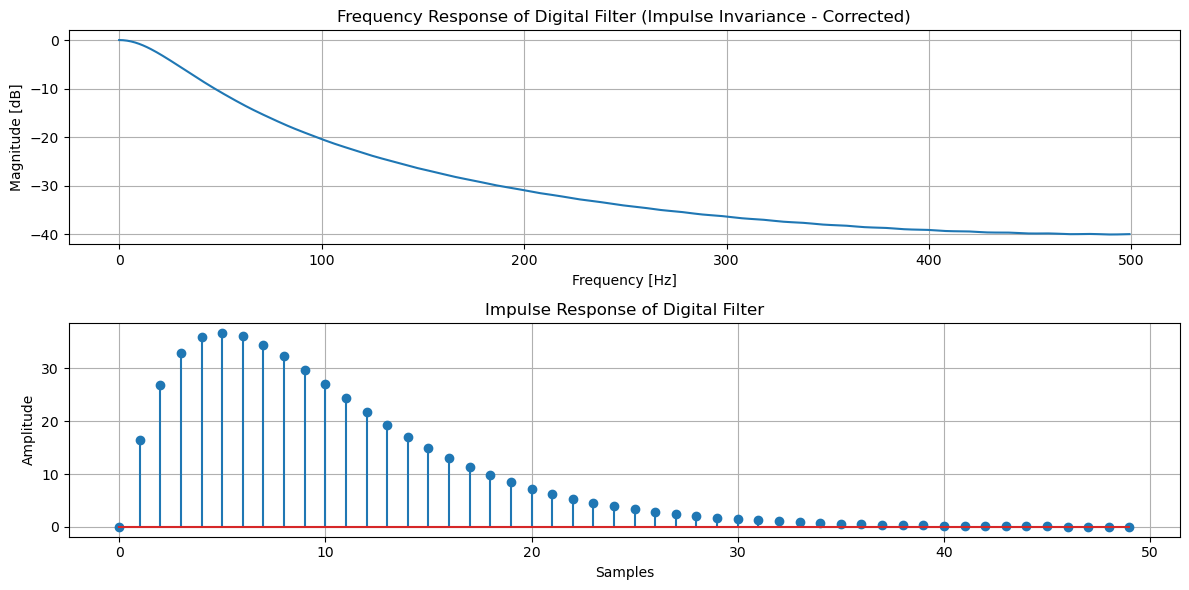

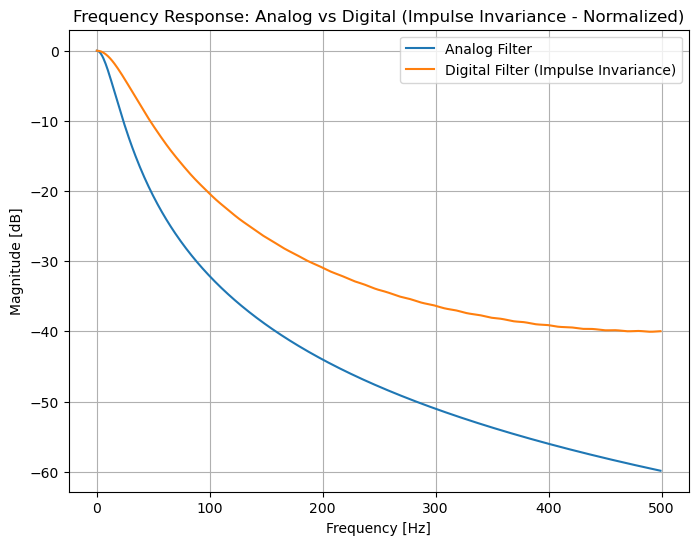

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters for the two-stage RC filter
RC = 0.01  # Choose RC parameter for the filter
fs = 1000  # Sampling frequency (Hz)
T = 1 / fs  # Sampling period

# Analog two-stage RC low-pass filter transfer function
numerator_analog = [1]
denominator_analog = [RC**2, 2*RC, 1]

# Step 1: Compute the impulse response of the analog filter
t_analog = np.linspace(0, 0.1, num=500)  # Shorter time to see details
t_impulse, h_analog = signal.impulse((numerator_analog, denominator_analog), T=t_analog)

# Step 2: Properly sample the impulse response with fixed intervals
sampling_intervals = np.arange(0, len(h_analog), 10)  # Sample every 10 steps
h_digital = h_analog[sampling_intervals]  # Properly sample the impulse response

# Step 3: FIR filter coefficients from sampled impulse response
b_digital = h_digital  # FIR filter coefficients from sampled impulse response
a_digital = [1]  # No feedback for FIR filter

# Step 4: Frequency response of the digital filter
w_digital, h_digital_response = signal.freqz(b_digital, a_digital, fs=fs)

# Normalize the digital filter's frequency response for comparison
h_digital_response = h_digital_response / np.max(abs(h_digital_response))  # Normalize to maximum

# Plot the frequency response of the digital filter
plt.figure(figsize=(12, 6))

# Plot frequency response of the digital filter
plt.subplot(2, 1, 1)
plt.plot(w_digital, 20 * np.log10(abs(h_digital_response) + 1e-10), label="Digital Filter (Impulse Invariance)")
plt.title("Frequency Response of Digital Filter (Impulse Invariance - Corrected)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()

# Plot impulse response of the digital filter
plt.subplot(2, 1, 2)
plt.stem(h_digital)
plt.title("Impulse Response of Digital Filter")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

# Step 5: Frequency response of the analog filter
# Compute analog frequency response at the same frequencies as the digital frequency response
w_digital_rad = 2 * np.pi * w_digital  # Convert digital frequencies to radians per second
_, h_analog_freq = signal.freqs(numerator_analog, denominator_analog, w_digital_rad)

# Normalize the analog filter's frequency response for comparison
h_analog_freq = h_analog_freq / np.max(abs(h_analog_freq))  # Normalize to maximum

# Plot analog and digital filter frequency responses together (corrected scaling)
plt.figure(figsize=(8, 6))

plt.plot(w_digital, 20 * np.log10(abs(h_analog_freq) + 1e-10), label="Analog Filter")
plt.plot(w_digital, 20 * np.log10(abs(h_digital_response) + 1e-10), label="Digital Filter (Impulse Invariance)")
plt.title("Frequency Response: Analog vs Digital (Impulse Invariance - Normalized)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.legend()
plt.grid()
plt.show()


### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.

C:\Users\admin\AppData\Local\Temp\ipykernel_7136\412908233.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio_signal = wavfile.read(file_path)


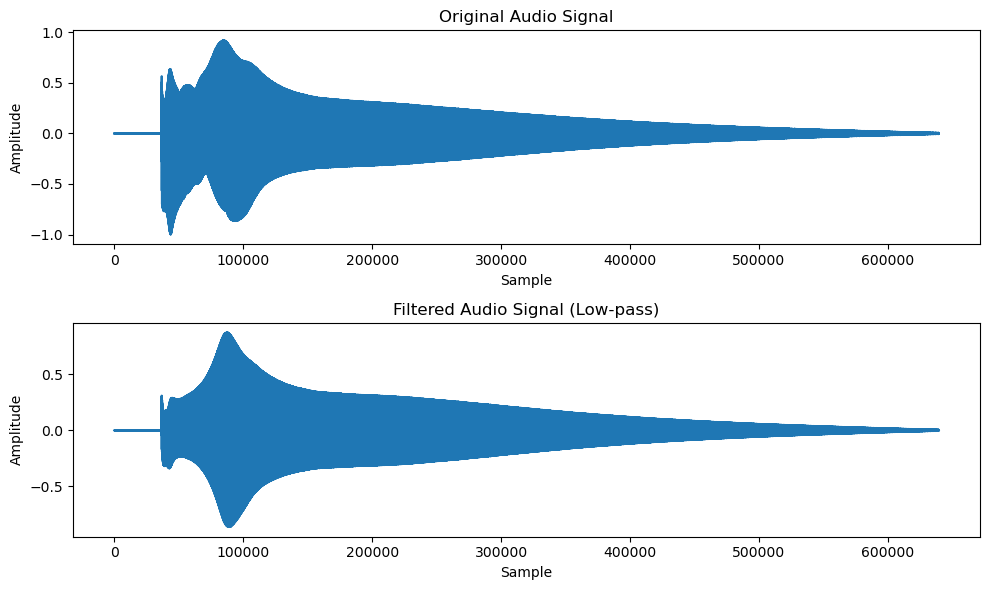

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

# Step 1: Load the audio file
file_path = 'guitar.wav'  # This should be your 'guitar.wav' file in the current directory
fs, audio_signal = wavfile.read(file_path)

# Normalize the signal to [-1, 1] range
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Step 2: Design a filter (e.g., low-pass filter)
cutoff_freq = 500  # Cutoff frequency in Hz (you can adjust this value)

# Design the filter using a Butterworth low-pass filter
b, a = signal.butter(4, cutoff_freq / (fs / 2), btype='low')  # 4th-order low-pass filter

# Step 3: Apply the filter to the audio signal
filtered_signal = signal.filtfilt(b, a, audio_signal)

# Step 4: Plot and compare the original vs filtered signal

plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(audio_signal)
plt.title('Original Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')


plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.title('Filtered Audio Signal (Low-pass)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


wavfile.write('filtered_guitar.wav', fs, (filtered_signal * 32767).astype(np.int16))  # Save as filtered_guitar.wav
